# Dreams of GLG101 class 2018

## Data Collection Detail
This is a fun project that I did while I was TAing for GLG101 class at ASU in Spring 2018.


During one of the class we had a in class exercise where students are required
to submit a piece of paper answering what the major in and what their dream job would be
if money and security is of no concern.

I collected all the papers and digitised them and during this process,
I negelected some details and made some generalization of their description. 

I started this project out of curiosity for the following questions:
* What is the class major composition
* What is the most frequently used words to describe dreams
* Are we working on our dreams

This project uses NLTK package to do the natural language processing and many thanks to the tutorial by [bonzanini](https://github.com/bonzanini/nlp-tutorial).

In [1]:
import os
import pandas as pd

infile = './data/dreams.data'

# read csv file into dataframe
# col 0 fields, major
# col 1 dreams descriptions
# col 2 where student`s major match their dream job description, 
# this column is determined by me based on my intuition and 
# some basic common sense, tagged either by "yes" or "no"
df = pd.read_csv(infile,header=None)

dreams_long = df[1].str.split().as_matrix()
fields_long = df[0].str.split().as_matrix()
match_long = df[2].as_matrix()

## Tokenisation
split file into tokens and count frequency of each token

In [2]:
from nltk.tokenize import word_tokenize

# make major string frame flat
flat_major = []
for sublist in fields_long:
    for item in sublist:
        flat_major.append(str(item))

major = ' '.join([i for i in flat_major])

#print("Number of major characters: {}".format(len(major)))
tokens_major = [t for t in word_tokenize(major)]
print("Major token num: {}".format(len(tokens_major)))

# make dreams string frame flat
flat_dreams = []
for sublist in dreams_long:
    for item in sublist:
        flat_dreams.append(str(item))

dreams = ' '.join([i for i in flat_dreams])

#print("Number of characters: {}".format(len(dreams)))

# all_tokens are dreams token
all_tokens = [t for t in word_tokenize(dreams)]
print("Dreams token number is: {}".format(len(all_tokens)))

Major token num: 167
Dreams token number is: 510


## Check frequency of key words on Major and Dreams

In [3]:
# count each token frequency
from collections import Counter
major_token_frequency = Counter(tokens_major)
token_frequency = Counter(all_tokens)

# print major token frequency
print("{0:15s}\t\t\t{1}".format("Major Token(top30)","freq"))
for word, freq in major_token_frequency.most_common(30):
    print("{0:15s}\t\t\t{1}".format(word,freq))
print("======================================")
    
# print dreams token frequency
print("{0:15s}\t\t\t{1}".format("Dreams Token(top30)","freq"))
for word, freq in token_frequency.most_common(30):
    print("{0:15s}\t\t\t{1}".format(word,freq))

Major Token(top30)			freq
CS             			46
Enginneering   			13
Civil          			9
psychology     			8
business       			5
Management     			4
and            			4
Industrial     			3
Education      			3
Engineering    			3
Supply         			3
chain          			2
Accounting     			2
design         			2
Elementary     			2
Mechanical     			2
Geology        			2
secondary      			2
education      			2
in             			2
study          			2
law            			2
Finance        			2
Chain          			2
marketing      			2
physhology     			2
Global         			2
Economics      			2
supply         			1
Conservation   			1
Dreams Token(top30)			freq
and            			63
or             			24
traveling      			12
for            			10
engineer       			9
company        			9
game           			8
software       			8
travel         			7
of             			6
in             			6
player         			5
video          			5
the            			5
volunteer      			4
on             			4
with           			4
&

## Remove Stop-Words
Remove common stop-wrods in english and remove punctuation

In [4]:
from nltk.corpus import stopwords
import string

# Construct stop list
stop_list = stopwords.words('english') + list(string.punctuation)

token_no_stop = [token for token in all_tokens if token not in stop_list]
major_token_no_stop = [token for token in tokens_major if token not in stop_list]

token_freq_no_stop = Counter(token_no_stop)
major_token_freq_no_stop = Counter(major_token_no_stop)

# major token without stop-words
print("{0:15s}\t\t\t{1}".format("Major Token(top30)","freq"))
for word,freq in major_token_freq_no_stop.most_common(30):
    print("{0:15s}\t\t\t{1}".format(word,freq))

print("\n=====================================")
# dreams token without stop-words
print("{0:15s}\t\t\t{1}".format("Dreams Token(top30)","freq"))
for word,freq in token_freq_no_stop.most_common(30):
    print("{0:15s}\t\t\t{1}".format(word,freq))
    

Major Token(top30)			freq
CS             			46
Enginneering   			13
Civil          			9
psychology     			8
business       			5
Management     			4
Industrial     			3
Education      			3
Engineering    			3
Supply         			3
chain          			2
Accounting     			2
design         			2
Elementary     			2
Mechanical     			2
Geology        			2
secondary      			2
education      			2
study          			2
law            			2
Finance        			2
Chain          			2
marketing      			2
physhology     			2
Global         			2
Economics      			2
supply         			1
Conservation   			1
Biology        			1
anthropology   			1

Dreams Token(top30)			freq
traveling      			12
engineer       			9
company        			9
game           			8
software       			8
travel         			7
player         			5
video          			5
volunteer      			4
CEO            			3
national       			3
startup        			3
professor      			3
makeup         			3
design         			3
designer       			3
media          			3
soc

## Text Normalisation, Stem
Replacing tokens with a canonical form, so we can group different spelling/variations of the same word

In [5]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# majors
major_all_token_lower = [t.lower() for t in tokens_major]
major_all_token_lower_no_stop = [t for t in major_all_token_lower if t not in stop_list]
major_tokens_norm = [stemmer.stem(t) for t in major_all_token_lower if t not in stop_list]
major_token_freq_norm = Counter(major_tokens_norm)
major_label = []
major_size = []
print("{0:15s}\t\t\t{1}".format("Major Token(top25)","freq"))
for word,freq in major_token_freq_norm.most_common(25):
    print("{0:20s}\t{1}".format(word,freq))
    major_label.append(word)
    major_size.append(freq)
total_count = sum(major_token_freq_no_stop.values())
other_count = total_count - sum(major_size)
#major_label.append('other')
#major_size.append(other_count)
    
print("==============================================")
    
# dreams
all_token_lower = [t.lower() for t in all_tokens]
all_token_lower_no_stop = [t for t in all_token_lower if t not in stop_list]
tokens_norm = [stemmer.stem(t) for t in all_token_lower if t not in stop_list]
token_freq_norm = Counter(tokens_norm)
dream_label = []
dream_size = []
print("{0:15s}\t\t\t{1}".format("Dreams Token(top25)","freq"))
for word,freq in token_freq_norm.most_common(25):
    print("{0:20s}\t{1}".format(word,freq))
    dream_label.append(word)
    dream_size.append(freq)


Major Token(top25)			freq
cs                  	46
enginn              	13
civil               	9
psycholog           	8
manag               	5
busi                	5
educ                	5
suppli              	4
chain               	4
industri            	3
engin               	3
market              	3
account             	2
design              	2
elementari          	2
mechan              	2
geolog              	2
secondari           	2
studi               	2
law                 	2
financ              	2
sociolog            	2
scienc              	2
physholog           	2
global              	2
Dreams Token(top25)			freq
travel              	19
softwar             	9
engin               	9
game                	9
compani             	9
design              	6
player              	5
video               	5
volunt              	4
tech                	4
ceo                 	3
nation              	3
comput              	3
startup             	3
professor           	3
makeup              	3
c

## Use Pie Chart to plot Major/Dreams composition

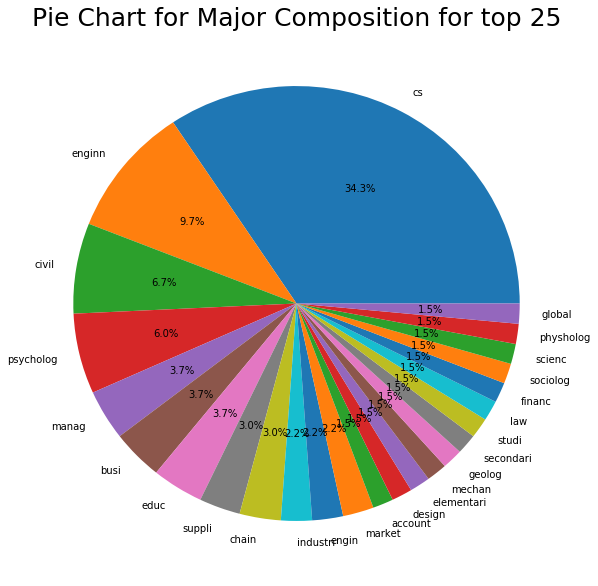

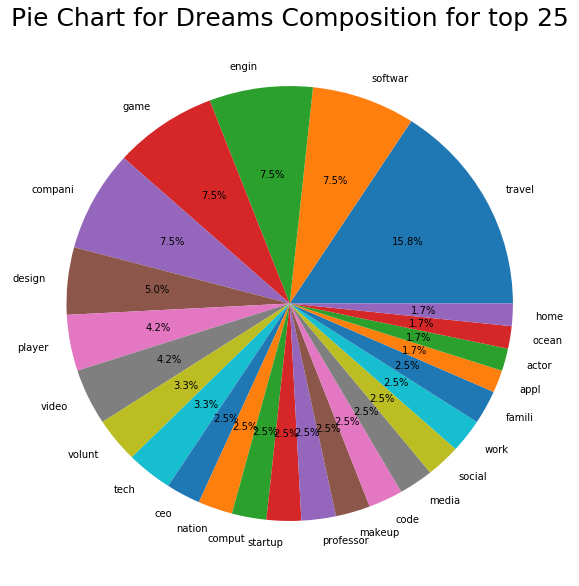

In [7]:
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib as mpl
mpl.rcParams['font.size'] = 10.0
rcParams['figure.figsize'] = 10, 10

plt.pie(major_size,labels=major_label,autopct='%1.1f%%')
plt.title("Pie Chart for Major Composition for top 25",size=25)
plt.show()
# print(major_token_freq_no_stop)

plt.pie(dream_size,labels=dream_label,autopct='%1.1f%%')
plt.title("Pie Chart for Dreams Composition for top 25",size=25)
plt.show()
# print(major_token_freq_no_stop)

## Play with n-grams

In [155]:
# for majors
from nltk import ngrams

phase_num = 2

title_label = []
title_size = []
phrases = Counter(ngrams(tokens_norm,phase_num))
# phrases = Counter(ngrams(all_token_lower_no_stop,phase_num))
print("{0:15s}\t\t\t{1}".format("Major ngrams(top15)","freq"))
for phrase,freq in phrases.most_common(15):
    print("{}\t{}".format(phrase,freq))
    title_label.append(phrase)
    title_size.append(freq)
#print(title_label)

Major ngrams(top15)			freq
('softwar', 'engin')	8
('travel', 'volunt')	4
('video', 'game')	4
('game', 'design')	4
('travel', 'nation')	2
('nation', 'park')	2
('help', 'peopl')	2
('media', 'compani')	2
('social', 'media')	2
('tech', 'compani')	2
('sing', 'danc')	2
('therapist', 'lego')	1
('lego', 'soccer')	1
('soccer', 'player')	1
('player', 'statist')	1


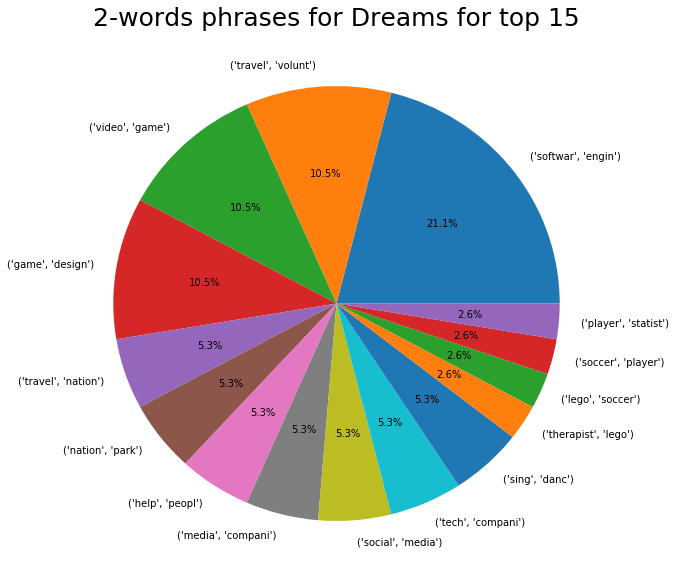

In [156]:
rcParams['figure.figsize'] = 10, 10
plt.pie(title_size,labels=title_label,autopct='%1.1f%%')
plt.title("2-words phrases for Dreams for top 15",size=25)
plt.show()

In [158]:
# 2words ngrams for majors
from nltk import ngrams
phase_num = 2
phrases = Counter(ngrams(major_all_token_lower_no_stop,phase_num))
print("{0:15s}\t\t\t{1}".format("Dreams ngrams","freq"))
for phrase,freq in phrases.most_common(20):
    print("{0}\t\t\t\t\t{1}".format(phrase,freq))

Dreams ngrams  			freq
('cs', 'cs')					22
('civil', 'enginneering')					6
('supply', 'chain')					4
('enginneering', 'cs')					4
('psychology', 'cs')					4
('cs', 'supply')					3
('chain', 'cs')					3
('cs', 'civil')					3
('civil', 'engineering')					3
('enginneering', 'management')					2
('cs', 'business')					2
('psychology', 'psychology')					2
('industrial', 'design')					2
('elementary', 'education')					2
('mechanical', 'enginneering')					2
('secondary', 'education')					2
('enginneering', 'psychology')					2
('business', 'law')					2
('cs', 'finance')					2
('cs', 'global')					2


# Are We Working on Dreams?
Special note:

The 'yes' and 'no' data used here are produced by classifing each student's case 
with common sense and my understanding of each major, therefore my personal subjectivity 
is heavily involved in the classification process.

Please refer to the actual data file(_./data/dreams.data_) for more insights.

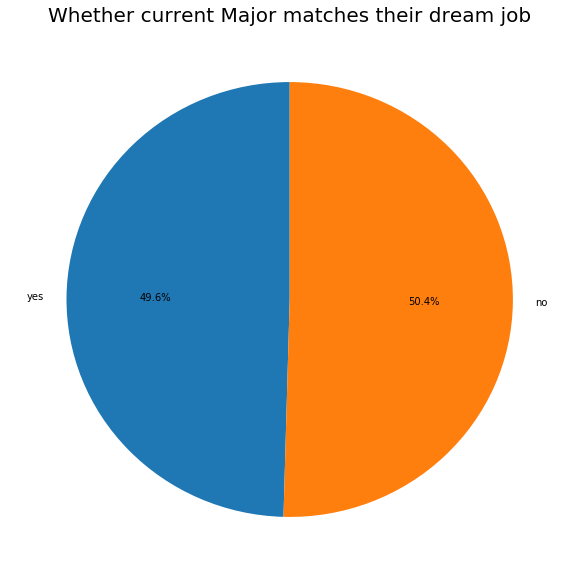

In [161]:
matches = match_long.tolist()
# yes_percentage = (len(matches.count('yes')) / len(matches))
yes_percentage = matches.count('yes') / len(matches)

match_label = ["yes","no"]
match_size = [yes_percentage,1-yes_percentage]
plt.pie(match_size,labels=match_label,autopct='%1.1f%%',startangle=90)
plt.title("Whether current Major matches their dream job",size=20)
plt.show()